# Building a Euribor Dual Curve and Valuing a Swap - Bloomberg Example

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.funding import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  15 Nov 2020 at 12:09 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
valuationDate = FinDate(26, 10, 2020)

In [4]:
valuationDate.addWeekDays(2).addTenor("1D")

29-OCT-2020

In [5]:
interpType = FinInterpTypes.LINEAR_ZERO_RATES

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [6]:
cal = FinCalendarTypes.TARGET

depoDCCType = FinDayCountTypes.ACT_360
depos = []

spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "1D", -0.46800/100.0, depoDCCType, calendarType = cal); depos.append(depo)

fras = []

swaps = []
swapType = FinSwapTypes.PAY
spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)
fixedDCCType = FinDayCountTypes.ACT_360
fixedFreqType = FinFrequencyTypes.ANNUAL
lag = 1 # days

# Standard OIS with standard annual terms
swap = FinOIS(settlementDate, "1W", swapType, -0.47000/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "2W", swapType, -0.47150/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "1M", swapType, -0.47300/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "2M", swapType, -0.47700/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "3M", swapType, -0.48150/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "4M", swapType, -0.48500/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "5M", swapType, -0.48900/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "6M", swapType, -0.49300/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "7M", swapType, -0.49700/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "8M", swapType, -0.50065/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "9M", swapType, -0.50375/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "10M", swapType, -0.50790/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "11M", swapType, -0.51100/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "12M", swapType, -0.51400/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "18M", swapType, -0.53250/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "2Y", swapType, -0.54300/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "30M", swapType, -0.54850/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "3Y", swapType, -0.54900/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "4Y", swapType, -0.53700/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "5Y", swapType, -0.51350/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "6Y", swapType, -0.48300/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)

swap = FinOIS(settlementDate, "7Y", swapType, -0.44650/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "8Y", swapType, -0.40480/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "9Y", swapType, -0.36220/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "10Y", swapType, -0.31550/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "11Y", swapType, -0.27100/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "12Y", swapType, -0.22850/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "15Y", swapType, -0.12300/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "20Y", swapType, -0.04000/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "25Y", swapType, -0.03450/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "30Y", swapType, -0.05750/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "35Y", swapType, -0.08160/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "40Y", swapType, -0.10485/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)
swap = FinOIS(settlementDate, "50Y", swapType, -0.14300/100.0, fixedFreqType, fixedDCCType, calendarType = cal, paymentLag=lag); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [7]:
oisCurve = FinOISCurve(valuationDate, oisDepos, oisFras, oisSwaps, interpType)

Inserting synthetic deposit


In [8]:
dfStart = oisCurve.df(settlementDate)

print("DFStart:", dfStart)

for depo in oisDepos:
    start = depo._startDate
    maturityDate = depo._maturityDate
    df = oisCurve.df(maturityDate) / dfStart
    days = maturityDate - settlementDate
    ccZeroRate = oisCurve.zeroRate(maturityDate, FinFrequencyTypes.CONTINUOUS, FinDayCountTypes.ACT_365F)
    print("%12s  %12s  %12s %5.0f  %12.9f  %9.6f"% (start, maturityDate, maturityDate, days, df, ccZeroRate*100))

for swap in oisSwaps:
    start = swap._effectiveDate
    maturityDate = swap._fixedLeg._maturityDate
    paymentDate = swap._fixedLeg._paymentDates[-1]
    df = oisCurve.df(paymentDate) / dfStart
    days = maturityDate - settlementDate
    ccZeroRate = oisCurve.zeroRate(paymentDate, FinFrequencyTypes.CONTINUOUS, FinDayCountTypes.ACT_365F)
    print("%12s  %12s  %12s %5.0f  %12.9f  %9.6f"% (start, maturityDate, paymentDate, days, df, ccZeroRate*100))

DFStart: 1.0000260006760175
 26-OCT-2020   28-OCT-2020   28-OCT-2020     0   1.000000000  -0.474506
 28-OCT-2020   29-OCT-2020   29-OCT-2020     1   1.000013000  -0.474505
 28-OCT-2020   04-NOV-2020   05-NOV-2020     7   1.000104515  -0.476361
 28-OCT-2020   11-NOV-2020   12-NOV-2020    14   1.000196583  -0.477858
 28-OCT-2020   30-NOV-2020   01-DEC-2020    33   1.000446994  -0.479463
 28-OCT-2020   28-DEC-2020   29-DEC-2020    61   1.000822426  -0.483675
 28-OCT-2020   28-JAN-2021   29-JAN-2021    92   1.001245800  -0.488341
 28-OCT-2020   01-MAR-2021   02-MAR-2021   124   1.001687246  -0.491981
 28-OCT-2020   29-MAR-2021   30-MAR-2021   152   1.002083193  -0.496171
 28-OCT-2020   28-APR-2021   29-APR-2021   182   1.002513059  -0.500327
 28-OCT-2020   28-MAY-2021   31-MAY-2021   212   1.002979433  -0.504777
 28-OCT-2020   28-JUN-2021   29-JUN-2021   243   1.003405640  -0.508308
 28-OCT-2020   28-JUL-2021   29-JUL-2021   273   1.003849643  -0.511562
 28-OCT-2020   30-AUG-2021   31-AUG-

## Value an OIS Contract

In [9]:
fixedCpn = -0.51350/100 # CHANGED
startDate = settlementDate
maturityDate = FinDate(28, 10, 2025,)
fixedDCCType = FinDayCountTypes.ACT_360
fixedFreqType = FinFrequencyTypes.ANNUAL
floatDCCType = FinDayCountTypes.ACT_360
floatFreqType = FinFrequencyTypes.ANNUAL
notional = 10 * ONE_MILLION

In [10]:
oisSwap = FinOIS(startDate, maturityDate, FinSwapTypes.RECEIVE, 
                 fixedCpn, fixedFreqType, fixedDCCType, 
                 notional, lag, 
                 0.0, floatFreqType, floatDCCType)

In [11]:
oisSwap.value(settlementDate, oisCurve)

-2.0469888113439083e-06

In [12]:
oisCurve.df(FinDate(29,10,2021)) / oisCurve.df(FinDate(28,10,2020))

1.0052541425594

In [16]:
oisSwap.printFixedLegPV()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
COUPON (%): -0.5135
FREQUENCY: FinFrequencyTypes.ANNUAL
DAY COUNT: FinDayCountTypes.ACT_360
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    RATE      PAYMENT       DF          PV        CUM PV
29-OCT-2021  28-OCT-2020  28-OCT-2021   365  1.013889  -0.51350    -52063.19  1.00525414    -52336.74    -52336.74
31-OCT-2022  28-OCT-2021  28-OCT-2022   365  1.013889  -0.51350    -52063.19  1.01115027    -52643.71   -104980.45
31-OCT-2023  28-OCT-2022  30-OCT-2023   367  1.019444  -0.51350    -52348.47  1.01693050    -53234.76   -158215.21
29-OCT-2024  30-OCT-2023  28-OCT-2024   364  1.011111  -0.51350    -51920.56  1.02210869    -53068.45   -211283.66
29-OCT-2025  28-OCT-2024  28-OCT-2025   365  1.013889  -0.51350    -52063.19  1.02648334    -53442.00   -264725.67


In [18]:
oisSwap.printFloatLegPV()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
SPREAD (BPS): 0.0
FREQUENCY: FinFrequencyTypes.ANNUAL
DAY COUNT: FinDayCountTypes.ACT_360
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    IBOR      PAYMENT       DF          PV        CUM PV
29-OCT-2021  28-OCT-2020  28-OCT-2021   365  1.013889   -0.51400    -52113.89  1.00525414    -52387.70    -52387.70
31-OCT-2022  28-OCT-2021  28-OCT-2022   365  1.013889   -0.57183    -57977.30  1.01115027    -58623.76   -111011.46
31-OCT-2023  28-OCT-2022  30-OCT-2023   367  1.019444   -0.56083    -57173.72  1.01693050    -58141.70   -169153.17
29-OCT-2024  30-OCT-2023  28-OCT-2024   364  1.011111   -0.50122    -50679.30  1.02210869    -51799.76   -220952.93
29-OCT-2025  28-OCT-2024  28-OCT-2025   365  1.013889   -0.42059    -42643.40  1.02648334    -43772.74   -264725.67


## Building the Dual Curve

Build the Ibor Curve

In [24]:
# Need to specify a UK calendar (trade was done in London)
cal = FinCalendarTypes.UK

depoDCCType = FinDayCountTypes.ACT_360
depos = []
spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "6M", -0.496/100.0, depoDCCType, calendarType=cal); depos.append(depo)

fraDCCType = FinDayCountTypes.ACT_360

fras = []
fra = FinIborFRA(settlementDate.addTenor("1M"), "6M", -0.493/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("2M"), "6M", -0.491/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("3M"), "6M", -0.494/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("4M"), "6M", -0.496/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("5M"), "6M", -0.499/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("6M"), "6M", -0.501/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("7M"), "6M", -0.505/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("8M"), "6M", -0.508/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("9M"), "6M", -0.518/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("10M"), "6M", -0.516/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("11M"), "6M", -0.518/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("12M"), "6M", -0.519/100.0, fraDCCType, calendarType=cal); fras.append(fra)

swaps = []
swapType = FinSwapTypes.PAY
fixedDCCType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreqType = FinFrequencyTypes.ANNUAL

swap = FinIborSwap(settlementDate, "2Y", swapType, -0.51375/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "3Y", swapType, -0.50600/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "4Y", swapType, -0.48225/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "5Y", swapType, -0.45100/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "6Y", swapType, -0.41500/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "7Y", swapType, -0.37530/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "8Y", swapType, -0.33250/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "9Y", swapType, -0.28810/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "10Y", swapType, -0.24180/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "11Y", swapType, -0.198/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "12Y", swapType, -0.156/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "15Y", swapType, -0.05375/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "20Y", swapType, 0.02325/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "25Y", swapType, 0.02300/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "30Y", swapType, -0.00510/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "40Y", swapType, -0.0627/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "50Y", swapType, -0.1125/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)

iborDepos = depos.copy()
iborFras = fras.copy()
iborSwaps = swaps.copy()

In [25]:
iborSingleCurve = FinIborSingleCurve(valuationDate, iborDepos, iborFras, iborSwaps, interpType)

In [26]:
iborDualCurve = FinIborDualCurve(valuationDate, oisCurve, iborDepos, iborFras, iborSwaps, interpType)

In [27]:
for swap in iborSwaps:
    dt = swap._maturityDate
    df = iborDualCurve.df(dt) / iborDualCurve.df(settlementDate)
    ccZeroRate = iborDualCurve.zeroRate(dt, FinFrequencyTypes.CONTINUOUS, FinDayCountTypes.ACT_365F)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

 28-OCT-2022  1.010356096 -0.515108
 30-OCT-2023  1.015367810 -0.507429
 28-OCT-2024  1.019538933 -0.483458
 28-OCT-2025  1.022890635 -0.452459
 28-OCT-2026  1.025325480 -0.416723
 28-OCT-2027  1.026766277 -0.377298
 30-OCT-2028  1.027162148 -0.334654
 29-OCT-2029  1.026503534 -0.290513
 28-OCT-2030  1.024741037 -0.244407
 28-OCT-2031  1.022315447 -0.200688
 28-OCT-2032  1.019211952 -0.158630
 29-OCT-2035  1.008391093 -0.055830
 29-OCT-2040  0.995528373  0.022246
 30-OCT-2045  0.994433898  0.022192
 28-OCT-2050  1.001741565 -0.005887
 28-OCT-2060  1.025398972 -0.062722
 28-OCT-2070  1.057126097 -0.111078


## Swap Valuation

In [28]:
fixedCpn = -0.4510/100.0
startDate = settlementDate
maturityDate = FinDate(28, 10, 2025)
fixedDCCType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreqType = FinFrequencyTypes.ANNUAL
floatDCCType = FinDayCountTypes.ACT_360
floatFreqType = FinFrequencyTypes.SEMI_ANNUAL
notional = 10 * ONE_MILLION

In [29]:
iborSwap = FinIborSwap(startDate, maturityDate, FinSwapTypes.RECEIVE, 
                 fixedCpn, fixedFreqType, fixedDCCType, 
                 notional, 
                 0.0, floatFreqType, floatDCCType)

In [30]:
iborSwap.value(settlementDate, iborSingleCurve)

3.934837877750397e-08

In [31]:
iborSwap.value(settlementDate, oisCurve, iborDualCurve)

20.71515340413316

In [33]:
iborSwap.printFixedLegPV()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
COUPON (%): -0.451
FREQUENCY: FinFrequencyTypes.ANNUAL
DAY COUNT: FinDayCountTypes.THIRTY_E_360_ISDA
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    RATE      PAYMENT       DF          PV        CUM PV
28-OCT-2021  28-OCT-2020  28-OCT-2021   360  1.000000  -0.45100    -45100.00  1.00523869    -45336.26    -45336.26
28-OCT-2022  28-OCT-2021  28-OCT-2022   360  1.000000  -0.45100    -45100.00  1.01110078    -45600.65    -90936.91
30-OCT-2023  28-OCT-2022  30-OCT-2023   362  1.005556  -0.45100    -45350.56  1.01691486    -46117.65   -137054.56
28-OCT-2024  30-OCT-2023  28-OCT-2024   358  0.994444  -0.45100    -44849.44  1.02209477    -45840.38   -182894.95
28-OCT-2025  28-OCT-2024  28-OCT-2025   360  1.000000  -0.45100    -45100.00  1.02647199    -46293.89   -229188.83


In [34]:
iborSwap.printFloatLegPV()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
SPREAD (BPS): 0.0
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
DAY COUNT: FinDayCountTypes.ACT_360
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    IBOR      PAYMENT       DF          PV        CUM PV
28-APR-2021  28-OCT-2020  28-APR-2021   182  0.505556   -0.49600    -25075.56  1.00249862    -25138.21    -25138.21
28-OCT-2021  28-APR-2021  28-OCT-2021   183  0.508333   -0.50100    -25467.50  1.00523869    -25600.92    -50739.13
28-APR-2022  28-OCT-2021  28-APR-2022   182  0.505556   -0.51900    -26238.33  1.00814172    -26451.96    -77191.08
28-OCT-2022  28-APR-2022  28-OCT-2022   183  0.508333   -0.51373    -26114.38  1.01110078    -26404.27   -103595.35
28-APR-2023  28-OCT-2022  28-APR-2023   182  0.505556   -0.48858    -24700.65  1.01402553    -25047.09   -128642.44
30-OCT-2023  28-APR-2023  30-OCT-2023   185  0.513889   -0.48102    -24719.02  1.01691486    -25137.14   -153779.58
29-APR-2024  30-OCT-2023  29-APR-2024   182  0.5

## Dual Curve

Look at short end

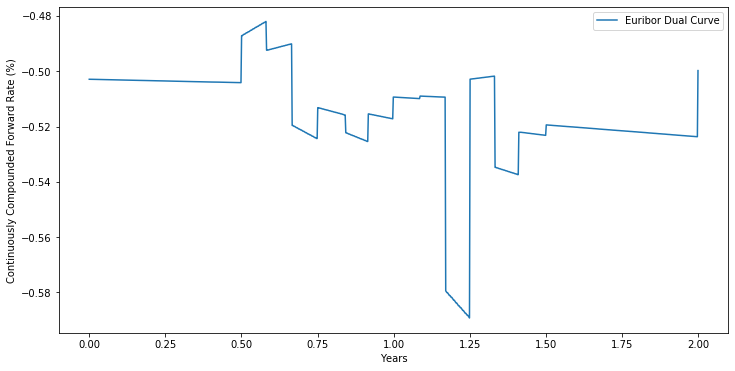

In [265]:
years = np.linspace(0, 2, 1000)
dates = settlementDate.addYears(years)
iborDualCurveFwds = iborDualCurve.fwd(dates)
plt.figure(figsize=(12,6))
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Continuously Compounded Forward Rate (%)")
plt.legend();

Look at long end

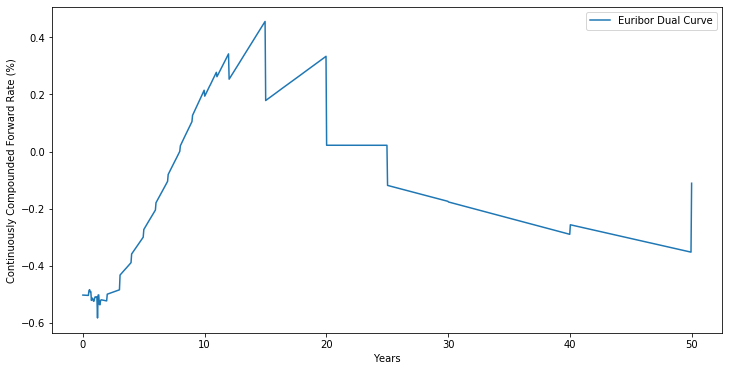

In [266]:
years = np.linspace(0, 50, 1000)
dates = settlementDate.addYears(years)
iborDualCurveFwds = iborDualCurve.fwd(dates)
plt.figure(figsize=(12,6))
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Continuously Compounded Forward Rate (%)")
plt.legend();

Copyright (c) Dominic O'Kane 2020